In [12]:
# import des differents libraires pour le projets : 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn  


In [13]:
# import de données  : 

df = pd.read_csv("/workspaces/credit-risk-/data.csv")

In [14]:
# liste des differentes variables 

df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [15]:
df.sample(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
10589,24,35004,RENT,0.0,PERSONAL,C,10000,12.84,0,0.29,Y,4
9399,24,62000,MORTGAGE,7.0,PERSONAL,A,6200,NaN,0,0.10,N,3
25766,27,37440,RENT,7.0,PERSONAL,B,2800,NaN,0,0.07,N,9
25486,33,85000,MORTGAGE,0.0,DEBTCONSOLIDATION,C,5000,13.61,0,0.06,Y,7
27227,30,115000,MORTGAGE,3.0,DEBTCONSOLIDATION,D,20000,14.59,1,0.17,N,7
6675,22,50000,MORTGAGE,4.0,DEBTCONSOLIDATION,B,5150,8.88,0,0.10,N,2
26601,29,107220,MORTGAGE,9.0,HOMEIMPROVEMENT,B,10000,NaN,0,0.09,N,10
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
10024,25,65000,MORTGAGE,2.0,MEDICAL,B,10000,10.75,0,0.15,N,4
6895,23,78000,RENT,0.0,MEDICAL,B,6000,9.99,0,0.08,N,2


In [16]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


Description des différentes variavles : 

Le jeu de données comporte 12 variables et 32 581 observations, chacune représentant une personne ayant contracté un prêt. Les variables se divisent en deux catégories : celles qui décrivent les caractéristiques du prêt (montant, taux d’intérêt, statut, etc.) et celles qui décrivent le profil de l’emprunteur (âge, revenu, situation professionnelle, etc.).
L’objectif est d’utiliser ces données historiques pour construire un modèle de scoring capable de prédire la probabilité de défaut pour de nouveaux candidats à un crédit.
Avant d’entamer la modélisation, il est essentiel de bien comprendre les variables à notre disposition :
person_age : âge de l’emprunteur ;
person_income : revenu annuel (ou salaire) de l’emprunteur ;
person_home_ownership : statut de logement (propriétaire, locataire, etc.) ;
person_emp_length : ancienneté professionnelle (en mois) ;
loan_intent : objet ou finalité du crédit (voiture, éducation, etc.) ;
loan_grade : notation de la solvabilité, de A (meilleure) à G (plus risquée) ;
loan_amnt : montant total du prêt ;
loan_int_rate : taux d’intérêt appliqué au prêt ;
loan_status : variable cible, indiquant un défaut de paiement (1) ou non (0) ;
loan_percent_income : part du crédit par rapport au revenu (ratio dette/revenu) ;
cb_person_default_on_file : défaut de paiement passé enregistré ou non ;
cb_person_cred_hist_length : durée de l’historique de crédit.
Nous allons maintenant passer à l’analyse exploratoire des données (EDA) afin de mieux comprendre la structure du dataset, détecter les éventuelles anomalies et identifier les relations clés entre les variables.

loan_status
0    0.781836
1    0.218164
Name: proportion, dtype: float64


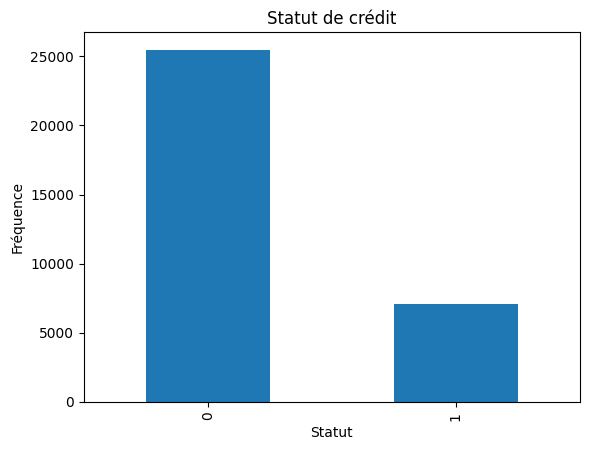

In [18]:
# Transformation de la variable cible en variable catégorielle
df['loan_status'] = df['loan_status'].astype('category')

# Table de fréquence de la variable cible ('loan_status')
freq_table = df['loan_status'].value_counts(normalize=True)
print(freq_table)

# Diagramme à barres de la variable 'loan_status'
df['loan_status'].value_counts().plot(kind='bar')
plt.title("Statut de crédit")
plt.xlabel("Statut")
plt.ylabel("Fréquence")
plt.show()